In [1]:
%matplotlib inline

In [2]:
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from unicode_codes import EMOJI_UNICODE
sns.set(style="white")
from twitter_search_funcs import smoothed_relative_freq

In [3]:
df_all = pd.DataFrame.from_csv("./data/alldata2016.csv")
df_lang = pd.DataFrame.from_csv("./data/langdata2016.csv")
df_allemoji = pd.DataFrame.from_csv("./data/allemojidata2016.csv")

In [4]:
# Totals
total_tweets = 101252136
total_tweets_wEmoji = 17094118
total_matches = 38600
total_wBefore = 23374
total_wAfter = 12317

In [5]:
# Find percentages of before matches, percentages of after matches, and count per million of total tweets searched
df_all['PercentBefore'] = 100. * df_all.CountBefore / df_all.CountBefore.sum()
df_all['PercentAfter'] = 100. * df_all.CountAfter / df_all.CountAfter.sum()
df_all['PPMBefore'] = 1e6 * df_all.CountBefore / total_tweets
df_all['PPMAfter'] = 1e6 * df_all.CountAfter / total_tweets

df_allemoji['Percent'] = 100. * df_allemoji.Count / df_allemoji.Count.sum()
df_allemoji['PPM'] = 1e6 * df_allemoji.Count / total_tweets

In [6]:
# Merge total counts into df_all
df_all_merged = df_all.merge(df_allemoji, on='Emoji', how='left')

In [7]:
df_topbefore = df_all_merged.sort_values('CountBefore', ascending=False)[:25]
df_topafter = df_all_merged.sort_values('CountAfter', ascending=False)[:25]
df_top = df_all_merged.sort_values('Count', ascending=False)[:25]

In [8]:
print(1e6 * df_all.CountBefore.sum() / total_tweets)
print(1e6 * df_all.CountAfter.sum() / total_tweets)

230.849450919
121.646816419


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['EmojiOne Color'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


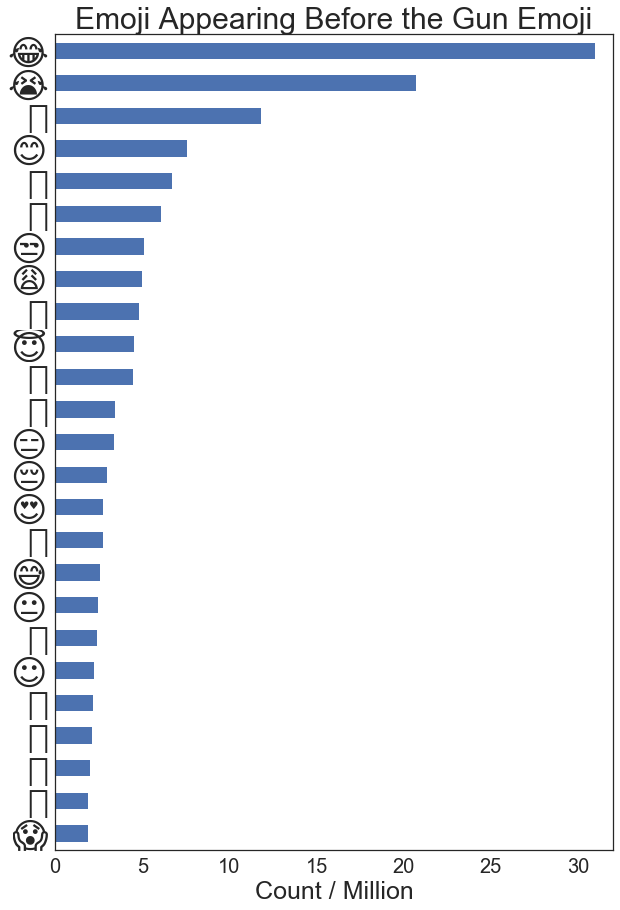

In [9]:
df_topbefore.sort_values('CountBefore', ascending=True).plot.barh(x='Emoji',
                                                                  y='PPMBefore',
                                                                  figsize=(10,15),
                                                                  legend=False,
                                                                  xlim=(0,32))
plt.title('Emoji Appearing Before the Gun Emoji', fontsize=30)
plt.yticks(fontsize=35, fontname='EmojiOne Color', rotation='horizontal')
plt.xticks(fontsize=20)
plt.ylabel('')
plt.xlabel('Count / Million', fontsize=25)
plt.savefig('before-bar.png')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['EmojiOne Color'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


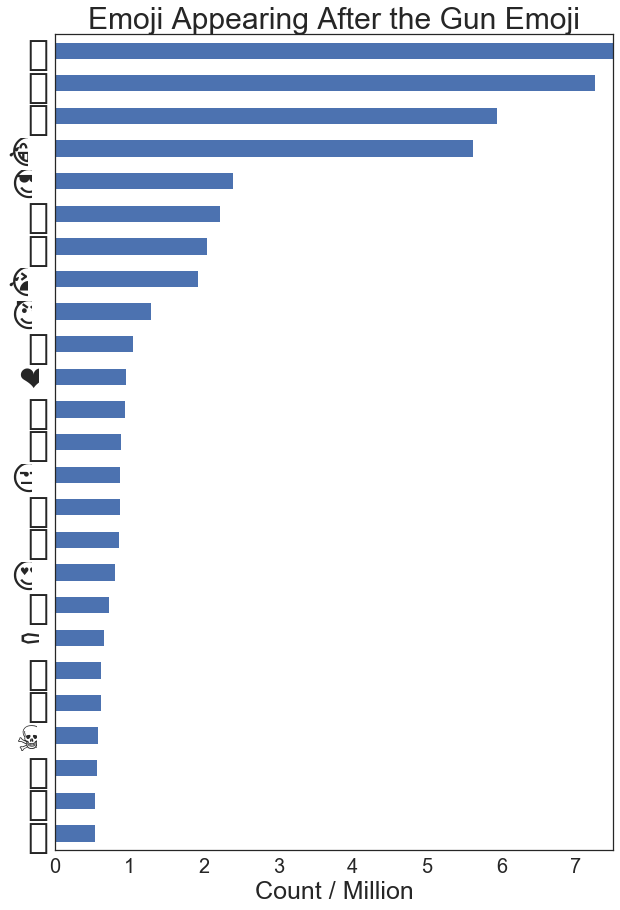

In [10]:
df_topafter.sort_values('CountAfter', ascending=True).plot.barh(x='Emoji',
                                                                y='PPMAfter',
                                                                figsize=(10,15),
                                                                legend=False,
                                                                xlim=(0,7.5))
plt.title('Emoji Appearing After the Gun Emoji', fontsize=30)
plt.yticks(fontsize=35, fontname='EmojiOne Color', rotation='horizontal')
plt.xticks(fontsize=20)
plt.ylabel('')
plt.xlabel('Count / Million', fontsize=25)
plt.savefig('after-bar.png')
plt.show()

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['EmojiOne Color'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


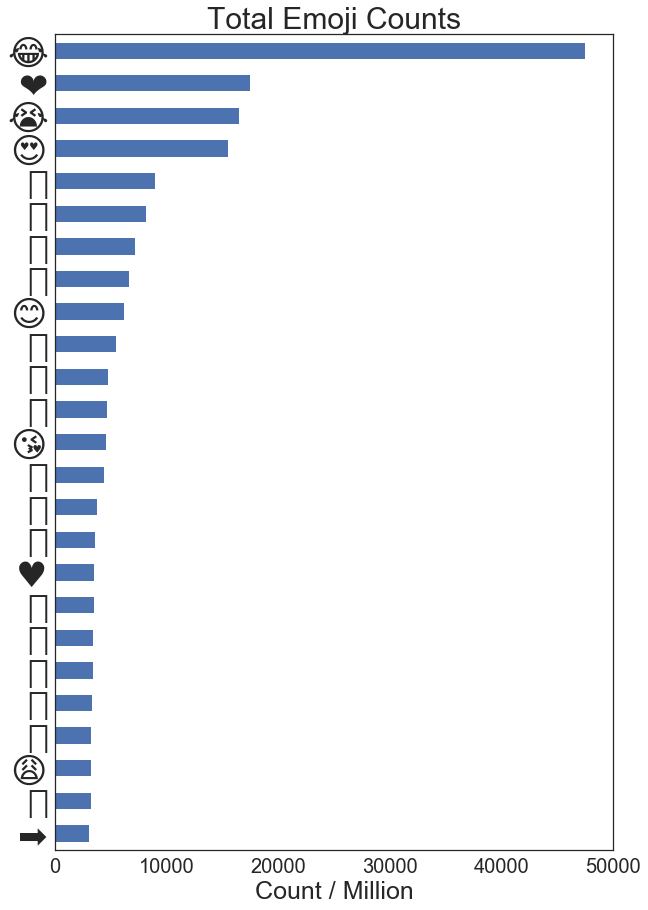

In [11]:
df_top.sort_values('Count', ascending=True).plot.barh(x='Emoji',
                                                      y='PPM',
                                                      figsize=(10,15),
                                                      legend=False,
                                                      xlim=(0,50000))
plt.title('Total Emoji Counts', fontsize=30)
plt.yticks(fontsize=35, fontname='EmojiOne Color', rotation='horizontal')
plt.xticks(fontsize=20)
plt.ylabel('')
plt.xlabel('Count / Million', fontsize=25)
plt.savefig('total.png')
plt.show()

In [12]:
pd.options.display.float_format = '{:.2f}'.format
df_topafter.head()

Emoji  CountBefore  CountAfter  PercentBefore  PercentAfter  PPMBefore  \
523     🔫          nan     5052.00            nan         41.02        nan   
16      🔪       614.00      735.00           2.63          5.97       6.06   
4       💣       450.00      601.00           1.93          4.88       4.44   
0       😂      3135.00      569.00          13.41          4.62      30.96   
29      😎       153.00      242.00           0.65          1.96       1.51   

     PPMAfter    Count  Percent      PPM  
523     49.90    55482     0.12   547.96  
16       7.26    28839     0.06   284.82  
4        5.94    27518     0.06   271.78  
0        5.62  4810304    10.78 47508.17  
29       2.39   205482     0.46  2029.41

In [13]:
pd.options.display.float_format = '{:.2f}'.format
df_topbefore.head()

Emoji  CountBefore  CountAfter  PercentBefore  PercentAfter  PPMBefore  \
0      😂      3135.00      569.00          13.41          4.62      30.96   
5      😭      2096.00      195.00           8.97          1.58      20.70   
7      💥      1197.00      224.00           5.12          1.82      11.82   
23     😊       767.00       48.00           3.28          0.39       7.58   
3      🙃       680.00       25.00           2.91          0.20       6.72   

    PPMAfter    Count  Percent      PPM  
0       5.62  4810304    10.78 47508.17  
5       1.93  1671746     3.75 16510.72  
7       2.21   167060     0.37  1649.94  
23      0.47   626739     1.40  6189.88  
3       0.25   132273     0.30  1306.37

In [14]:
pd.options.display.float_format = '{:.2f}'.format
df_top.head()

Emoji  CountBefore  CountAfter  PercentBefore  PercentAfter  PPMBefore  \
0      😂      3135.00      569.00          13.41          4.62      30.96   
53     ❤       117.00       97.00           0.50          0.79       1.16   
5      😭      2096.00      195.00           8.97          1.58      20.70   
57     😍       281.00       81.00           1.20          0.66       2.78   
56     💕       217.00      106.00           0.93          0.86       2.14   

    PPMAfter    Count  Percent      PPM  
0       5.62  4810304    10.78 47508.17  
53      0.96  1766052     3.96 17442.12  
5       1.93  1671746     3.75 16510.72  
57      0.80  1564388     3.51 15450.42  
56      1.05   902590     2.02  8914.28

In [15]:
# Add smoothed relative frequencies to df_all_merged
df_topafter['Score1'] = smoothed_relative_freq(df_topafter.CountAfter, df_topafter.Count,
                                               df_topafter.CountAfter.sum(), df_topafter.Count.sum(),
                                               N=1)
df_topafter['Score100'] = smoothed_relative_freq(df_topafter.CountAfter, df_topafter.Count,
                                               df_topafter.CountAfter.sum(), df_topafter.Count.sum(),
                                               N=100)
df_topafter['Score10000'] = smoothed_relative_freq(df_topafter.CountAfter, df_topafter.Count,
                                               df_topafter.CountAfter.sum(), df_topafter.Count.sum(),
                                               N=10000)

df_topbefore['Score1'] = smoothed_relative_freq(df_topbefore.CountBefore, df_topbefore.Count,
                                               df_topafter.CountAfter.sum(), df_topafter.Count.sum(),
                                               N=1)
df_topbefore['Score100'] = smoothed_relative_freq(df_topbefore.CountBefore, df_topbefore.Count,
                                               df_topafter.CountAfter.sum(), df_topafter.Count.sum(),
                                               N=100)
df_topbefore['Score10000'] = smoothed_relative_freq(df_topbefore.CountBefore, df_topbefore.Count,
                                               df_topafter.CountAfter.sum(), df_topafter.Count.sum(),
                                               N=10000)

In [16]:
df_topafter.sort_values('Score10000', ascending=False).head(15)

Emoji  CountBefore  CountAfter  PercentBefore  PercentAfter  PPMBefore  \
523     🔫          nan     5052.00            nan         41.02        nan   
16      🔪       614.00      735.00           2.63          5.97       6.06   
4       💣       450.00      601.00           1.93          4.88       4.44   
286     ⚰         4.00       66.00           0.02          0.54       0.04   
7       💥      1197.00      224.00           5.12          1.82      11.82   
64      ☠        66.00       58.00           0.28          0.47       0.65   
199     💂        11.00       54.00           0.05          0.44       0.11   
29      😎       153.00      242.00           0.65          1.96       1.51   
74      💸        51.00       57.00           0.22          0.46       0.50   
34      💰        90.00       54.00           0.39          0.44       0.89   
41      😈       153.00      131.00           0.65          1.06       1.51   
37      👊       166.00       95.00           0.71          0.77       1.64   
27      😒       516.00       89.00           2.21          0.72       5.10   
28      💀       242.00       90.00           1.04          0.73       2.39   
55      🌹        63.00       87.00           0.27          0.71       0.62   

     PPMAfter   Count  Percent     PPM  Score1  Score100  Score10000  
523     49.90   55482     0.12  547.96  139.71    136.31       40.21  
16       7.26   28839     0.06  284.82   39.10     37.34        7.48  
4        5.94   27518     0.06  271.78   33.50     31.93        6.31  
286      0.65    4840     0.01   47.80   20.87     16.44        1.66  
7        2.21  167060     0.37 1649.94    2.06      2.05        1.57  
64       0.57    7585     0.02   74.91   11.72     10.05        1.55  
199      0.53    4767     0.01   47.08   17.34     13.65        1.54  
29       2.39  205482     0.46 2029.41    1.81      1.80        1.48  
74       0.56   36752     0.08  362.98    2.38      2.33        1.29  
34       0.53   35753     0.08  353.11    2.32      2.27        1.27  
41       1.29  129565     0.29 1279.63    1.55      1.55        1.26  
37       0.94  125506     0.28 1239.54    1.16      1.16        1.08  
27       0.88  195753     0.44 1933.32    0.70      0.70        0.82  
28       0.89  228622     0.51 2257.95    0.60      0.61        0.76  
55       0.86  230341     0.52 2274.92    0.58      0.58        0.74

In [17]:
df_topbefore.sort_values('Score10000', ascending=False).head(15)

Emoji  CountBefore  CountAfter  PercentBefore  PercentAfter  PPMBefore  \
7      💥      1197.00      224.00           5.12          1.82      11.82   
16     🔪       614.00      735.00           2.63          5.97       6.06   
4      💣       450.00      601.00           1.93          4.88       4.44   
3      🙃       680.00       25.00           2.91          0.20       6.72   
6      🙂       348.00       31.00           1.49          0.25       3.44   
45     😇       459.00       26.00           1.96          0.21       4.53   
27     😒       516.00       89.00           2.21          0.72       5.10   
80     😑       340.00       30.00           1.45          0.24       3.36   
26     😐       250.00       12.00           1.07          0.10       2.47   
33     😔       304.00       24.00           1.30          0.19       3.00   
46     😩       503.00       32.00           2.15          0.26       4.97   
5      😭      2096.00      195.00           8.97          1.58      20.70   
43     🙄       486.00       39.00           2.08          0.32       4.80   
23     😊       767.00       48.00           3.28          0.39       7.58   
22     😅       260.00       16.00           1.11          0.13       2.57   

    PPMAfter    Count  Percent      PPM  Score1  Score100  Score10000  
7       2.21   167060     0.37  1649.94   11.00     10.91        6.42  
16      7.26    28839     0.06   284.82   32.66     31.20        6.38  
4       5.94    27518     0.06   271.78   25.08     23.92        4.94  
3       0.25   132273     0.30  1306.37    7.89      7.82        4.34  
6       0.31    77291     0.17   763.35    6.91      6.80        3.09  
45      0.26   136354     0.31  1346.68    5.17      5.12        3.05  
27      0.88   195753     0.44  1933.32    4.05      4.02        2.77  
80      0.30   113403     0.25  1120.01    4.60      4.56        2.61  
26      0.12    65096     0.15   642.91    5.89      5.79        2.55  
33      0.24   158039     0.35  1560.85    2.95      2.93        2.03  
46      0.32   329110     0.74  3250.40    2.35      2.34        1.94  
5       1.93  1671746     3.75 16510.72    1.92      1.92        1.85  
43      0.39   345228     0.77  3409.59    2.16      2.16        1.82  
23      0.47   626739     1.40  6189.88    1.88      1.88        1.72  
22      0.16   189937     0.43  1875.88    2.10      2.09        1.63